In [1]:
import opyf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coord, var = opyf.hdf5_Read("frame_2500_to_10404_with_step_4_and_shift_100.hdf5")

#### Coord
0 = T  coord[0][1][n], len 80

1 = X  coord[1][1][i], len 960

2 = Y  coord[2][1][j], len 540
#### var
0 = Ux  var[0][1][0][j,i], shape 540x960

1 = Uy  var[1][1][0][j,i], shape 540x960


In [3]:
coord[0]

['T_[s]',
 array([ 2502.,  2602.,  2702.,  2802.,  2902.,  3002.,  3102.,  3202.,
         3302.,  3402.,  3502.,  3602.,  3702.,  3802.,  3902.,  4002.,
         4102.,  4202.,  4302.,  4402.,  4502.,  4602.,  4702.,  4802.,
         4902.,  5002.,  5102.,  5202.,  5302.,  5402.,  5502.,  5602.,
         5702.,  5802.,  5902.,  6002.,  6102.,  6202.,  6302.,  6402.,
         6502.,  6602.,  6702.,  6802.,  6902.,  7002.,  7102.,  7202.,
         7302.,  7402.,  7502.,  7602.,  7702.,  7802.,  7902.,  8002.,
         8102.,  8202.,  8302.,  8402.,  8502.,  8602.,  8702.,  8802.,
         8902.,  9002.,  9102.,  9202.,  9302.,  9402.,  9502.,  9602.,
         9702.,  9802.,  9902., 10002., 10102., 10202., 10302., 10402.])]

## Is the grid constant ? Can I use a dx instead of keeping X,Y

In [4]:
dt_base = coord[0][1][1] - coord[0][1][0]
for i,t in enumerate(coord[0][1]):
    if i==0:
        t_m = t
    else:
        if t-t_m!=dt_base:
            print(f"Ite {i}: dt DIFF\ndt = {t-t_m}")
        t_m = t

print("DONE")
print(dt_base)

DONE
100.0


In [5]:
dx_base = coord[1][1][1] - coord[1][1][0]
for i,x in enumerate(coord[1][1]):
    if i==0:
        x_m = x
    else:
        if x-x_m!=dx_base:
            print(f"Ite {i}: dx DIFF\ndx = {x-x_m}")
        x_m = x

print("DONE")

Ite 2: dx DIFF
dx = 0.0028000000000000004
Ite 4: dx DIFF
dx = 0.0028000000000000004
Ite 5: dx DIFF
dx = 0.0028000000000000004
Ite 6: dx DIFF
dx = 0.0028000000000000004
Ite 7: dx DIFF
dx = 0.0028000000000000004
Ite 8: dx DIFF
dx = 0.002799999999999997
Ite 9: dx DIFF
dx = 0.0028000000000000004
Ite 10: dx DIFF
dx = 0.0028000000000000004
Ite 11: dx DIFF
dx = 0.0028000000000000004
Ite 12: dx DIFF
dx = 0.002799999999999997
Ite 13: dx DIFF
dx = 0.002800000000000004
Ite 14: dx DIFF
dx = 0.002799999999999997
Ite 15: dx DIFF
dx = 0.002800000000000004
Ite 16: dx DIFF
dx = 0.002799999999999997
Ite 17: dx DIFF
dx = 0.002800000000000004
Ite 18: dx DIFF
dx = 0.002799999999999997
Ite 19: dx DIFF
dx = 0.002800000000000004
Ite 20: dx DIFF
dx = 0.002799999999999997
Ite 21: dx DIFF
dx = 0.002799999999999997
Ite 22: dx DIFF
dx = 0.002800000000000004
Ite 23: dx DIFF
dx = 0.002799999999999997
Ite 24: dx DIFF
dx = 0.002799999999999997
Ite 25: dx DIFF
dx = 0.002800000000000011
Ite 26: dx DIFF
dx = 0.0027999999

In [6]:
dy_base = coord[2][1][1] - coord[2][1][0]
for i,y in enumerate(coord[2][1]):
    if i==0:
        y_m = y
    else:
        if y-y_m!=dy_base:
            print(f"Ite {i}: dy DIFF\ndy = {y-y_m}")
        y_m = y

print("DONE")

Ite 2: dy DIFF
dy = -0.0028000000000001357
Ite 5: dy DIFF
dy = -0.0028000000000001357
Ite 7: dy DIFF
dy = -0.0028000000000001357
Ite 10: dy DIFF
dy = -0.0028000000000001357
Ite 13: dy DIFF
dy = -0.0028000000000001357
Ite 15: dy DIFF
dy = -0.0028000000000001357
Ite 18: dy DIFF
dy = -0.0028000000000001357
Ite 20: dy DIFF
dy = -0.0028000000000001357
Ite 23: dy DIFF
dy = -0.0028000000000001357
Ite 25: dy DIFF
dy = -0.0028000000000001357
Ite 28: dy DIFF
dy = -0.0028000000000001357
Ite 31: dy DIFF
dy = -0.0028000000000001357
Ite 33: dy DIFF
dy = -0.0028000000000001357
Ite 36: dy DIFF
dy = -0.0028000000000001357
Ite 38: dy DIFF
dy = -0.0028000000000001357
Ite 41: dy DIFF
dy = -0.0028000000000001357
Ite 43: dy DIFF
dy = -0.0028000000000001357
Ite 46: dy DIFF
dy = -0.0028000000000001357
Ite 49: dy DIFF
dy = -0.0028000000000001357
Ite 51: dy DIFF
dy = -0.0028000000000001357
Ite 54: dy DIFF
dy = -0.0028000000000001357
Ite 56: dy DIFF
dy = -0.0028000000000001357
Ite 59: dy DIFF
dy = -0.00280000000

In [7]:
estim = 0.0028
diff_max = 0
for i,x in enumerate(coord[1][1]):
    if i==0:
        x_m = x
    else:
        if x-x_m - estim> diff_max:
            diff_max = x-x_m - estim
            print(x)
            print(x_m)
            print(f"New max diff: i {i} max diff {diff_max}")
        x_m = x

print(diff_max/estim*100)
print("We will assume dx = ", estim)


0.007
0.0042
New max diff: i 2 max diff 4.336808689942018e-19
0.0378
0.034999999999999996
New max diff: i 13 max diff 3.903127820947816e-18
0.0714
0.0686
New max diff: i 25 max diff 1.0842021724855044e-17
0.1302
0.12739999999999999
New max diff: i 46 max diff 2.47198095326695e-17
1.0038
1.001
New max diff: i 358 max diff 1.3574211199518516e-16
4.847932571256613e-12
We will assume dx =  0.0028


In [8]:
estim = -0.0028
diff_may = 0
for i,y in enumerate(coord[2][1]):
    if i==0:
        y_m = y
    else:
        if y-y_m - estim> diff_may:
            diff_may = y-y_m - estim
            print(y)
            print(y_m)
            print(f"New may diff: i {i} may diff {diff_may}")
        y_m = y

print(diff_may/estim*100)
print("We will assume dy = ", estim)


1.5078
1.5106
New may diff: i 1 may diff 8.630249292984615e-17
-3.082231890351648e-12
We will assume dy =  -0.0028


In [9]:
arr = np.load("../NSFlume90s/numpy/data_2.npy")

In [10]:
np.shape(arr)

(256, 256, 5)

In [11]:
shape = (len(coord[1][1]), len(coord[2][1]), 2)
array = np.zeros(shape)
array[:,:,0] = var[0][1][0].T
array[:,:,1] = var[1][1][0].T

v_field = np.zeros((540,960,2))
v_field[:,:,0] = array[:,:,0].T
v_field[:,:,1] = array[:,:,1].T

In [12]:
np.save("field_measured", v_field)

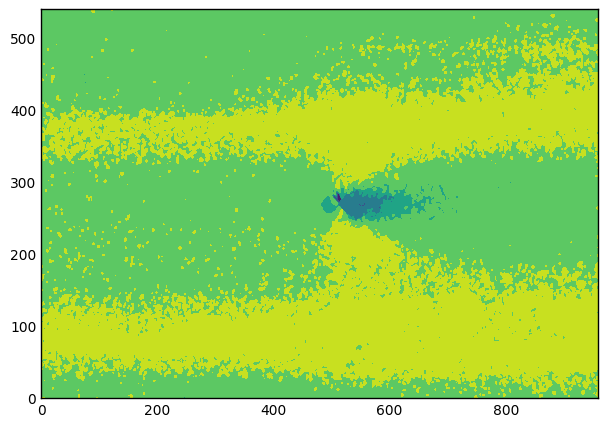

In [13]:
plt.contourf(v_field[:,:,0])

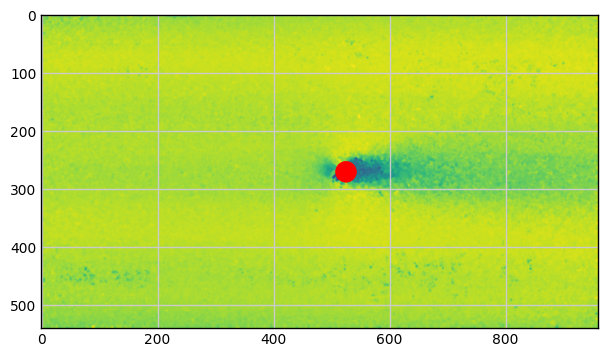

In [39]:
from matplotlib.patches import Circle

dx = 0.0028
R = 0.05/dx
fig, ax = plt.subplots()
ax.imshow(var[0][1][0])
circle = Circle((525, 270), radius=R, color='red', fill=True)
ax.add_patch(circle)

plt.show()

In [40]:
mean_vel = np.sqrt(np.power(v_field[:,:,0], 2) + np.power(v_field[:,:,1],2))

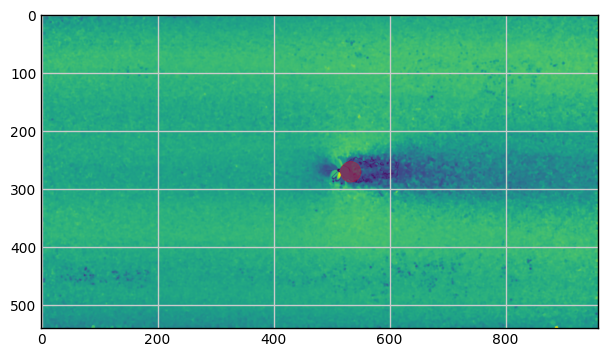

In [84]:
dx = 0.0028
R = 0.05/dx

fig, ax = plt.subplots()
ax.imshow(mean_vel)
circle = Circle((533, 270), radius=R, color='red', fill=True, alpha=0.3)
ax.add_patch(circle)


plt.show()

In [86]:

out_file = 'results_0.png'
out_path = f"file/images/{out_file}"

height, width = mean_vel.shape
dpi = 100
figsize = (width / dpi, height / dpi)

box = (263, 803, 0, 540)

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
ax.imshow(mean_vel, cmap='viridis', interpolation='nearest', origin='upper')
ax.axis('off')
ax.set_aspect('equal')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig(out_path, dpi=dpi, bbox_inches=None, pad_inches=0, transparent=True)
plt.close()


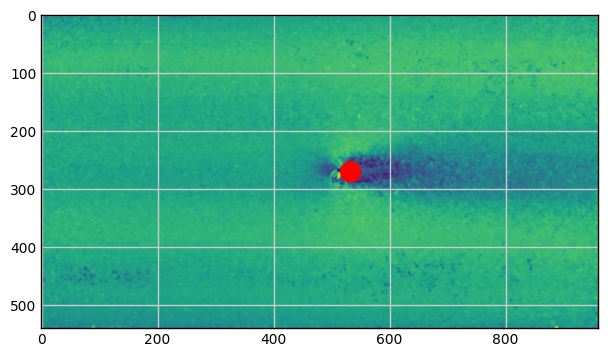

In [88]:
image = plt.imread("file/images/results_0.png")
fig, ax = plt.subplots()
ax.imshow(image)

H=540
circle = Circle((533, 270), radius=R, color='red', fill=True)
ax.add_patch(circle)
ax.set_aspect('equal')

plt.show()

In [69]:
mean_vel.shape

(540, 960)

In [70]:
image.shape

(540, 960, 4)